# Model Measurement Analysis
Using any dataset and any classifier, calculate TP, TN, FP and FN from sklearn library functions. Also calculate different metrics (Accuracy, Precision, Recall(Sensitivity), F1-Score, MCC, Specificity, Negative Predictive Value) by defining our own functions. Compare your values with scikit-learn's library functions. Get the result of Confusion Matrix using sklearn. Using sklearn, plot the ROC & AUC Curves for your test data and random probabilities. Using sklearn, calculate the AUC of your test data and of random probabilities. Interpret the results. Write the inference/analysis of each output. Expectation is Supervised Learning Algorithms. Therefore, use any classifier. 



#### Importing the libraries

In [10]:
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve



#### Creating our own dataset of emails and using Binary Classification measurements where '1' denotes spam email and '0' denotes not spam.

In [11]:
actual_data = [random.randint(0,1) for i in range(20)]
predicted_data = actual_data[0:8] + [1,0,0,1] + actual_data[12:]
print("Actual Data    : ", actual_data)
print("Predicted Data : ", predicted_data)  

Actual Data    :  [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0]
Predicted Data :  [1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0]


#### Calculating TP,TN,FP,FN using sklearn function

In [12]:
tn, fp, fn, tp = confusion_matrix(actual_data, predicted_data).ravel()
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 8
FP: 1
FN: 2
TP: 9


#### Calculating different metrics

In [13]:
def accuracy(tn, fp, fn, tp):
    return (tp+tn)/(tp+fp+tn+fn)

def precision(tp, fp):
    return tp / (tp + fp)

def recall(tp,fn):
    return tp / (tp + fn)

def f1(tp, fp, fn):
    p = precision(tp,fp)
    r = recall(tp,fn)
    return 2 * (p * r) / (p + r)

def mcc(tn, fp, fn, tp):
    return ((tp * tn) - (fp * fn))/(((tp + fp) * (tp + fn) * (fp + tn) * (tn + fn)) ** (1/2))

#### Comparing with sklearn's libray functions

In [14]:
my_accuracy = accuracy(tn, fp, fn, tp)
sk_accuracy = accuracy_score(actual_data,predicted_data)
print(f"My Accuracy       : {my_accuracy : 0.4}")
print(f"sklearn Accuracy  : {sk_accuracy : 0.4}")

my_precision = precision(tp, fp)
sk_precision = precision_score(actual_data,predicted_data)
print(f"My Precision      : {my_precision : 0.4}")
print(f"sklearn Precision : {sk_precision : 0.4}")

my_recall = recall(tp, fn)
sk_recall = recall_score(actual_data,predicted_data)
print(f"My Recall         : {my_recall : 0.4}")
print(f"sklearn Recall    : {sk_recall : 0.4}")

my_f1_score = f1(tp, fp, fn)
sk_f1_score = f1_score(actual_data,predicted_data)
print(f"My f1 score       : {my_f1_score : 0.4}")
print(f"sklearn f1 score  : {sk_f1_score : 0.4}")

my_mcc = mcc(tn, fp, fn, tp)
sk_mcc = matthews_corrcoef(actual_data,predicted_data)
print(f"My MCC            : {my_mcc : 0.4}")
print(f"sklearn MCC       : {sk_mcc : 0.4}")

My Accuracy       :  0.85
sklearn Accuracy  :  0.85
My Precision      :  0.9
sklearn Precision :  0.9
My Recall         :  0.8182
sklearn Recall    :  0.8182
My f1 score       :  0.8571
sklearn f1 score  :  0.8571
My MCC            :  0.7035
sklearn MCC       :  0.7035


#### Confusion matrix

sklearn's Confusion Matrix Plot

              Predicted Value
True Value      TP     FN
                FP     TN

              Predicted Value
True Value      9      2 
                1      8 


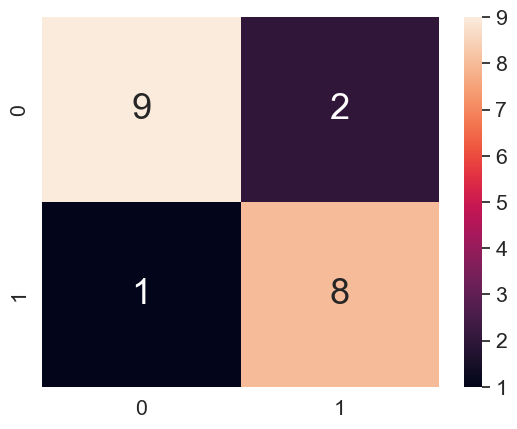

In [15]:
sk_array = [[tp, fn], [fp, tn]]
df = pd.DataFrame(sk_array, range(2), range(2))
sb.set(font_scale = 1.4)
sb.heatmap(df, annot = True, annot_kws = {"size" : 26})

print("sklearn's Confusion Matrix Plot")
print()
print("              Predicted Value")
print("True Value      TP     FN")
print("                FP     TN")
print()
print("              Predicted Value")
print(f"True Value      {tp : ^2}     {fn : ^2}")
print(f"                {fp : ^2}     {tn : ^2}")
plt.show()


#### Plotting Precision-Recall Curve

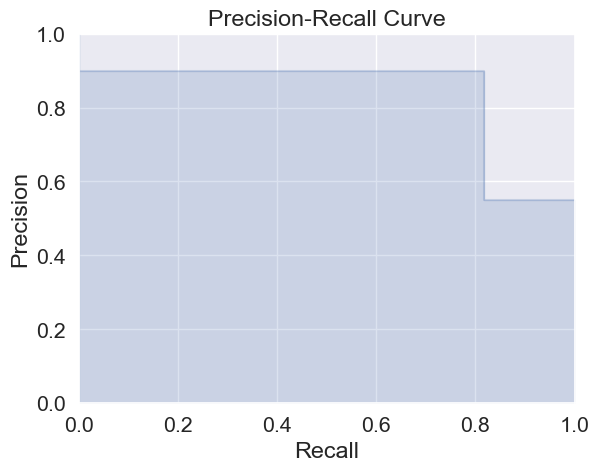

In [16]:
precision_curve, recall_curve, _ = precision_recall_curve(actual_data, predicted_data)
plt.step(recall_curve, precision_curve, color = "b", alpha = 0.2, where = "post")
plt.fill_between(recall_curve, precision_curve, color = "b", alpha = 0.2, step = "post")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("Precision-Recall Curve")
plt.show()

#### ROC - AUC Curve and Score

sklearn ROC-AUC Score :  0.8535353535353535


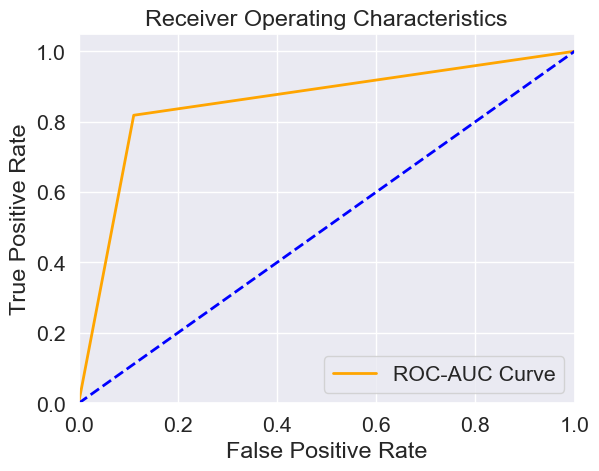

In [17]:
print("sklearn ROC-AUC Score : ", roc_auc_score(actual_data,predicted_data))
fpr, tpr, _ = roc_curve(actual_data,predicted_data)
plt.figure()
plt.plot(fpr,tpr, color = "orange", lw = 2, label = "ROC-AUC Curve")
plt.plot([0,1], [0,1], color = "blue", lw = 2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristics")
plt.legend(loc = "lower right")
plt.show()